# Task 3.4

**Clustering**
- *Write a Python program to evaluate performance using clustering on the datasets obtained in Task 3.1.*
- *Markdown Question: Between clustering and classification algorithms, which one performed better for star dataset. Justify your answer.*

## Table of Contents
- [Introduction](#Introduction)
- [Imports](#Imports)
- [Star Dataset](#Star-Dataset)
    - [Cluster the star dataset using K-means](#Cluster-the-star-dataset-using-K-means)
    - [Evaluating the K-means clusters](#Evaluating-the-star-K-means-clusters)
    - [Cluster the star dataset using Mini Batch K-means](#Cluster-the-star-dataset-using-Mini-Batch-K-means)
    - [Evaluating the Mini Batch K-means clusters](#Evaluating-the-star-Mini-Batch-K-means-clusters)
- [GWP Dataset](#GWP-Dataset)
    - [Determine optimal number of clusters](#Determine-optimal-number-of-clusters)
    - [Cluster the GWP dataset using K-means](#Cluster-the-GWP-dataset-using-K-means)
    - [Evaluating the K-means clusters](#Evaluating-the-GWP-K-means-clusters)
    - [Build a Random Forest regressor for each cluster](#Build-a-Random-Forest-regressor-for-each-cluster)
    - [Comparison with a Random Forest regressor trained on the whole dataset](#Comparison-with-a-Random-Forest-regressor-trained-on-the-whole-dataset)
- [Markdown Question](#Markdown-Question)

## Introduction <a class="anchor" id="Introduction"></a>

This notebook was completed by B921400 on 19/05/2023 and is intended to fulfill and exceed the requirements of task 3.4 of the 22COC131 coursework. The star dataset is focused on first, where the K-means clustering algorithm is used to cluster the dataset into three clusters (in line with the number of classes in the dataset). The clusters are then evaluated using a number of metrics, including the silhouette score, Davies-Bouldin index, and Calinski-Harabasz index, as well as the accuracy with cluster association used to predict the original labels. Then, Mini Batch K-means clustering is explored as an alternative given the size of the star dataset, with similar metrics computed.

The GWP dataset is then focused on, with the first step being to find the optimal number of clusters since it is a regression problem. The K-means clustering algorithm is used to cluster the samples in the dataset, with the same metrics used to evaluate the clusters as with the star dataset. Then, a Random Forest regressor is trained for each cluster, with the performance of the regressors compared to the Random Forest regressor trained on the whole dataset in task 3.2/3.3. This notebook is concluded with a response to the markdown question.

## Imports <a class="anchor" id="Imports"></a>

In [1]:
import numpy as np

from sklearn.cluster import KMeans, MiniBatchKMeans

from preprocessing_utils import preprocess_star_dataset, preprocess_gwp_dataset
from plot_utils import plot_clusters
from evaluation_utils import evaluate_clusters, optimise_n_kmeans_clusters, perform_cross_validation, evaluate_regression_model_for_n_clusters
from model_utils import create_tuned_gwp_rf

## Star Dataset <a class="anchor" id="Star-Dataset"></a>

Firstly, we'll use the method created in task 3.1 to load and preprocess the star dataset.

In [2]:
star_X, star_Y = preprocess_star_dataset('star_assessment.csv')

#### Cluster the star dataset using K-means <a class="anchor" id="Cluster-the-star-dataset-using-K-means"></a>

Then, we will use the K-means clustering algorithm to cluster the star dataset. Since there are three classes in the dataset, we will use three clusters. Additionally, given clustering is an unsupervised learning technique, the whole dataset will be used to train the model.

In [3]:
star_km = KMeans(n_clusters=3, n_init='auto')
star_km_Y_pred = star_km.fit_predict(star_X)

Now that the dataset has been clustered, we can plot the clusters. Since the dataset has more than two features, the `plot_clusters` function will use PCA to reduce the dimensionality of the dataset to two dimensions so that it can be visualised on a 2D plot.

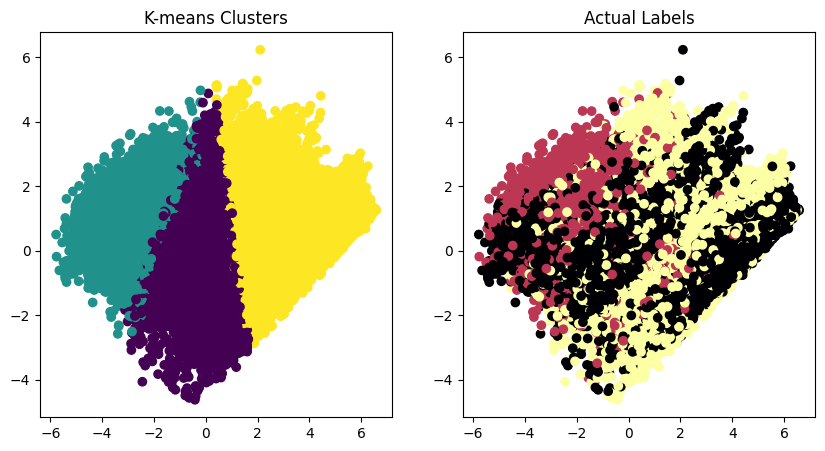

In [4]:
plot_clusters(star_X, star_km_Y_pred, y=star_Y)

As can be seen from the plot on the left, the clusters identified by K-means are relatively well segregated, despite overlapping slightly. The plot on the right shows the samples coloured by their true classes once having their dimensions reduced to two using PCA. The clusters in each graph share some similarities, with their being a distinct class on the left side of the plot and a class with the majority of samples on the right. However, the class in the middle of the left graph is distributed across the two classes on the right graph. Therefore, it is not expected that the K-means clusters will represent the true classes well.

#### Evaluating the K-means clusters <a class="anchor" id="Evaluating-the-star-K-means-clusters"></a>

In order to effectively evaluate the K-means clusters, the `evaluate_clusters` function will be used. This function will calculate the accuracy, silhouette score, Davies-Bouldin index and Calinski-Harabasz index for the clusters so that a well-rounded evaluation can be performed.

In [5]:
evaluate_clusters(X=star_X, Y_pred=star_km_Y_pred, Y=star_Y)

Cluster Accuracy: 0.5180872063822083
Silhouette Score:  0.3767373703864194
Davies-Bouldin Index:  1.0475294450124477
Calinski-Harabasz Index:  83565.22836888695


The K-means clustering algorithm achieved an accuracy score of 0.518 when comparing the true classes to the most prominent class in each cluster. This is a relatively low score, but isn't surprising given the overlap in the plot displayed above. The silhouette score of 0.377 indicates that the clusters have reasonable separation and are distinguishable from one another, but do have some overlap. The Davies-Bouldin index of 1.048 also suggests that the clusters are separate and compact whilst overlapping in some places. Finally, the Calinski-Harabasz index of 83565.228 indicates that the clusters are of a high quality and are well separated.

#### Cluster the star dataset using Mini Batch K-means <a class="anchor" id="Cluster-the-star-dataset-using-Mini-Batch-K-means"></a>

Since the star dataset has a large number of samples, it may be useful to use the Mini Batch K-means algorithm to cluster the dataset. Although the algorithm is similar to K-means, smaller batches of data are used to train the model.

In [22]:
star_mbkm = MiniBatchKMeans(n_clusters=3, n_init='auto')
star_mbkm_Y_pred = star_mbkm.fit_predict(star_X)

Again, the clusters will be plotted using PCA to reduce the dimensionality of the dataset to two dimensions.

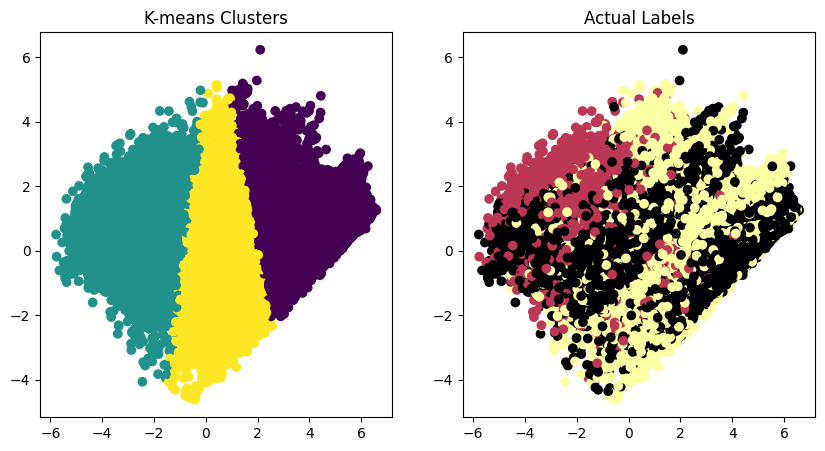

In [23]:
plot_clusters(star_X, star_mbkm_Y_pred, y=star_Y)

The clusters produced differ slightly to those created by the standard K-means algorithm. The main difference is in the cluster sizes, with the cluster on the left of the left image being larger than that displayed in the previous graph. This has also resulted in the central cluster being smaller. However, the clusters are still generally separate with the majority of the samples in each cluster being the same colour in the plot.

#### Evaluating the Mini Batch K-means clusters <a class="anchor" id="Evaluating-the-star-Mini-Batch-K-means-clusters"></a>

The `evaluate_clusters` function will be used again to evaluate the Mini Batch K-means clusters.

In [24]:
evaluate_clusters(X=star_X, Y_pred=star_mbkm_Y_pred, Y=star_Y)

Cluster Accuracy: 0.4819127936177917
Silhouette Score:  0.2995939124928732
Davies-Bouldin Index:  1.2124744384627595
Calinski-Harabasz Index:  73322.35295160195


The accuracy of the Mini Batch K-means algorithm is slightly lower than the standard K-means algorithm at 0.482 which was expected due to the smaller batch sizes used to train the model. Additionally, the silhouette score, Davies-Bouldin index and Calinski-Harabasz index all indicate that the clusters are of a worse quality than those produced by the standard K-means algorithm and potentially have more overlap.

## GWP Dataset <a class="anchor" id="GWP-Dataset"></a>

Next, the GWP dataset will be loaded and preprocessed using the method created in task 3.1.

In [2]:
gwp_X, gwp_Y = preprocess_gwp_dataset('gwp_assessment.csv')

#### Determine optimal number of clusters <a class="anchor" id="Determine-optimal-number-of-clusters"></a>

Since the target variable is continuous in the GWP dataset, the optimal number of clusters will need to be determined using a metric. In this case, the silhouette score will be calculated for different numbers of clusters and the number of clusters with the highest silhouette score will be used. The function `optimise_n_kmeans_clusters` was created to perform this task.

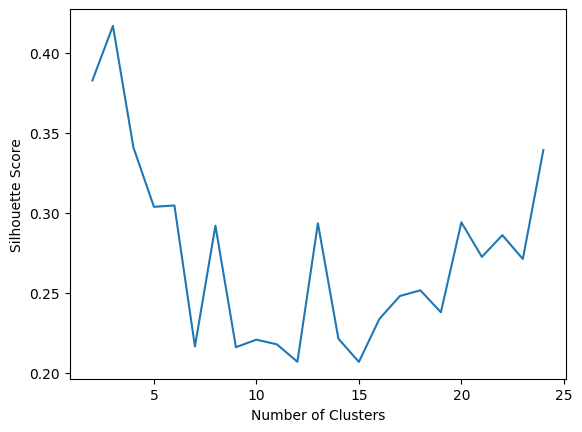

In [5]:
n_clusters = optimise_n_kmeans_clusters(X=gwp_X, range_n_clusters=range(2, 25))

Clearly, the optimal number of clusters is 3 as it has the highest silhouette score. Whilst the silhouette score seems to be rising once the number of clusters is greater than 19, it would not be appropriate to explore a greater amount of clusters because the clusters would be too small to be meaningful due to the size of the dataset. With a high number of clusters, they may be too specific and not general enough to be useful.

#### Cluster the GWP dataset using K-means <a class="anchor" id="Cluster-the-GWP-dataset-using-K-means"></a>

Since we now know that the optimal number of clusters that are generalised enough to be useful is 3, the K-means algorithm will be used to cluster the GWP dataset.

In [6]:
gwp_km = KMeans(n_clusters=n_clusters, n_init='auto')
gwp_Y_pred = gwp_km.fit_predict(gwp_X)

Again, the clusters will be plotted using PCA to reduce the dimensionality of the dataset to two dimensions.

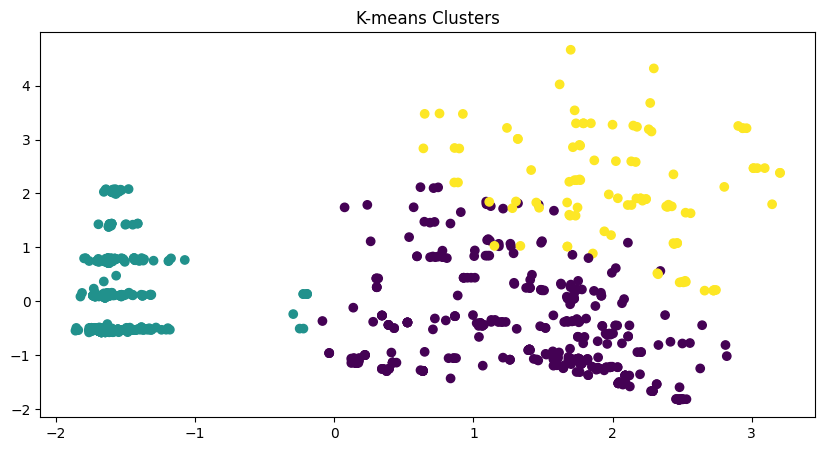

In [7]:
plot_clusters(gwp_X, gwp_Y_pred)

From the plot, it is clear that the clusters are generally well separated with most of the samples in each cluster being the same colour. Some overlap does exist between the two clusters on the right side of the plot, and a few of the data points that are apart of the cluster on the left lie close to the bottom cluster. However, the clusters are distinguishable enough that they could be useful.

#### Evaluating the K-means clusters <a class="anchor" id="Evaluating-the-GWP-K-means-clusters"></a>

The `evaluate_clusters` function will be used again to evaluate the K-means clusters, although this time an accuracy score will not be calculated since the target variable is continuous.

In [2]:
evaluate_clusters(X=gwp_X, Y_pred=gwp_Y_pred)

Silhouette Score:  0.41698426396835064
Davies-Bouldin Index:  1.058873550030625
Calinski-Harabasz Index:  606.5891828161263


A silhouette score of 0.417 indicates that the samples have been well clustered and are mostly separated. This point is backed up by the Calinski-Harabasz index which could be interpreted as the clusters being of a good quality. The Davies-Bouldin index of 1.059 on the other hand, suggests that the clusters suffer from some overlap, which can be seen in the plot above.

#### Build a Random Forest regressor for each cluster <a class="anchor" id="Build-a-Random-Forest-regressor-for-each-cluster"></a>

Next, the clusters produced by the K-means algorithm will be used to train multiple Random Forest regressors (one for each cluster) with the aim of improving on the performance achieved by training a single Random Forest regressor on the whole dataset in task 3.2/3.3. The `evaluate_model_for_n_clusters` function was created to perform this task.

In [19]:
mean_rmse_clusters = evaluate_regression_model_for_n_clusters(create_tuned_gwp_rf(), gwp_X, gwp_Y, gwp_Y_pred, n_clusters)

CV RMSE for cluster 0: 0.1757921997790459
CV RMSE for cluster 1: 0.054553869879419604
CV RMSE for cluster 2: 0.0949562449436105


To evaluate the performance of the regressors trained for each cluster, the average root mean squared error was calculated by performing cross-validation on each regressor. As can be seen in the results above, the average RMSE for cluster 0 was 0.176, which is higher than that achieved by training a single Random Forest regressor on the whole dataset. However, the average RMSE for clusters 1 and 2 were much lower at 0.055 and 0.095 respectively. This means that they can more accurately predict the actual productivity of samples in their respective clusters than the single Random Forest regressor trained on the whole dataset.

#### Comparison with a Random Forest regressor trained on the whole dataset <a class="anchor" id="Comparison-with-a-Random-Forest-regressor-trained-on-the-whole-dataset"></a>

In order to draw an effective comparison between the different approaches i.e. training a single Random Forest regressor on the whole dataset vs training a random Forest regressor for each cluster generated by the K-means algorithm, the cross-validation scores for the single Random Forest regressor will be calculated again and compared to the mean of the average RMSEs for each cluster.

In [14]:
rf_tuned = create_tuned_gwp_rf()
rf_tuned_scores = perform_cross_validation(rf_tuned, gwp_X, gwp_Y)

Mean RMSE: 0.13131731140519698
Standard Deviation: 0.020452334686287824


In [9]:
mean_rmse_clusters = np.mean(mean_rmse_clusters)
print(f'Mean RMSE across all clusters: {mean_rmse_clusters}')

Mean RMSE across all clusters: 0.1097592475303232


The mean RMSE for the single Random Forest regressor trained on the whole dataset is 0.131 which is higher than the mean RMSE of 0.110 for the regressors trained for each cluster. This means that the regressors trained for each cluster are generally more accurate at predicting the actual productivity of samples in their respective clusters than the single Random Forest regressor trained on the whole dataset. It also shows the power of using clustering algorithms to split the dataset into smaller subsets that can be modelled more accurately.

## Markdown Question <a class="anchor" id="Markdown-Question"></a>

*Between clustering and classification algorithms, which one performed better for star dataset. Justify your answer.*

The classification algorithms showed much better performance than the clustering algorithms for the star dataset. This claim is supported by the conclusions that were drawn from the evaluation metrics generated for each algorithm when trained on the star dataset. The classification algorithms used (SVM and Gradient Boosting) both achieved impressive accuracy scores of 0.973 and 0.977 respectively. In comparison, the clustering algorithms (K-means and Mini Batch K-means) achieved much lower accuracy scores of 0.518 and 0.482 respectively when cluster association was used to predict the original labels of the samples within each cluster. This demonstrates that the classification algorithms were much better at predicting the labels of the samples in the star dataset than the clustering algorithms. Additional metrics and plots were also used to support this claim, with high F1-score, precision and recall scores being achieved by the classification algorithms, as well as the confusion matrices, precision-recall curves and ROC curves showing their ability to accurately predict the labels of the samples. On the other hand, while the clustering algorithms were able to achieve reasonable silhouette scores, Davies-Bouldin indices and Calinski-Harabasz indices, the plot showing the samples coloured by class demonstrated that accurate, well separated clusters wouldn't be possible.